# Which Vizualization Library?

# ¯\_(ツ)_/¯

# How do you choose?
* Programming preference? imperative vs. declarative
    * imperative - How do I make this visualization?
    * declarative - What should this visualization show?
* What's the data like? 2D, 3D, timeseries, vector, raster
* What's the task? statistics, contour plots, image analysis, etc
* How will this viz be shared? publication, dashboard, web portal

# Matplotlib
    * imperative - describe how the graph is made
    * highly customizable down to every last detail
    * backends for static & interactive images
    * syntactically similar to matlab/NCL/IDLE/etc
    * lots of libraries built on top of it, customization via axes object
    

In [2]:

import pandas as pd
df = pd.read_csv("data/nyc_2005_2015.csv")
cp = df[df['STATION_NAME'].str.contains('NEW YORK NY US')][['DATE','MNTM']]
cp['DATE']
cp['date'] = pd.to_datetime(cp['DATE'], format="%Y%m%d")
cp['temp'] = (cp['MNTM']/10*9/5) + 32 

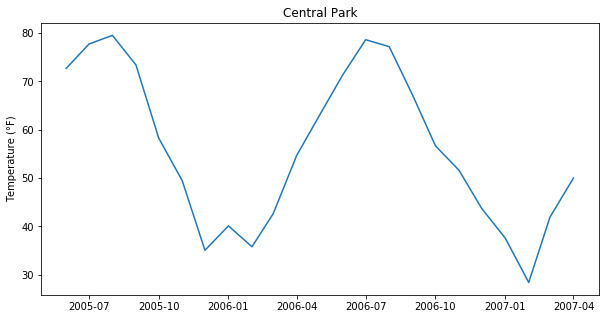

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.plot_date(cp['date'], cp['temp'], '-')
_ = ax.set_title("Central Park")
_ = ax.set_ylabel("Temperature (°F)")

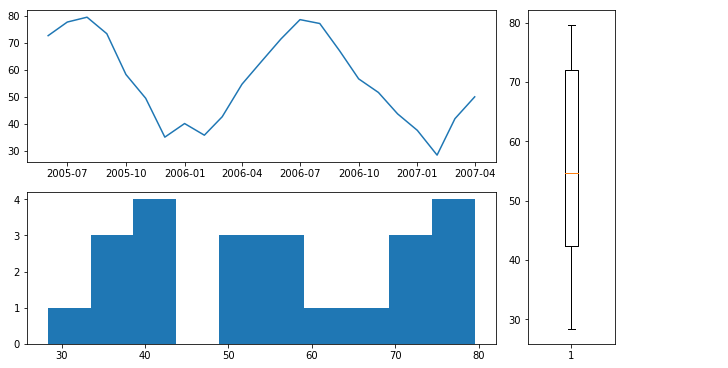

In [4]:
%matplotlib inline
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(10,5))
gs = gridspec.GridSpec(nrows=2, ncols=5, figure=fig)
ax1 = fig.add_subplot(gs[0,:-2])
_ = ax1.plot_date(cp['date'], cp['temp'], '-')
ax2 = fig.add_subplot(gs[1,:-2])
_ = ax2.hist(cp['temp'])
ax3 = fig.add_subplot(gs[:,-2:-1])
_ = ax3.boxplot(cp['temp'])

# Where'd that data come from?
* pandas
* geopandas
* xarray

## data structure libraries that incidentally support some plotting

In [5]:
import pandas as pd
df = pd.read_csv("data/nyc_2005_2015.csv")
cp = df[df['STATION_NAME'].str.contains('NEW YORK NY US')][['DATE','MNTM']]
cp['DATE']
cp['date'] = pd.to_datetime(cp['DATE'], format="%Y%m%d")
cp['temp'] = (cp['MNTM']/10*9/5) + 32 
cpp = cp[['date', 'temp']].set_index('date')

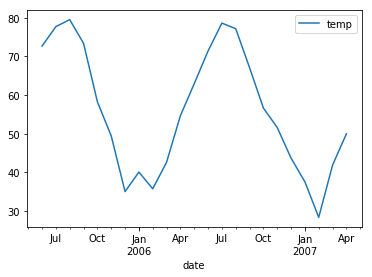

In [6]:
_ = cpp.plot()

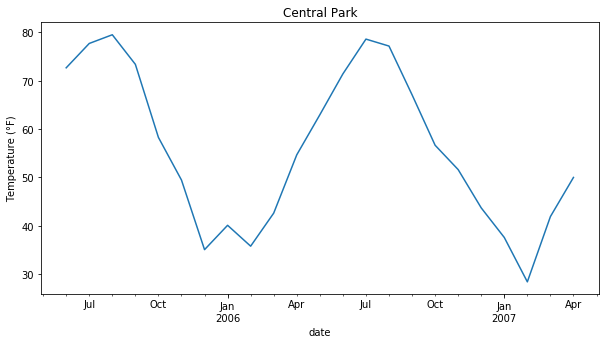

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
_ = cpp.plot(ax=ax, legend=None)
_ = ax.set_title("Central Park")
_ = ax.set_ylabel("Temperature (°F)")

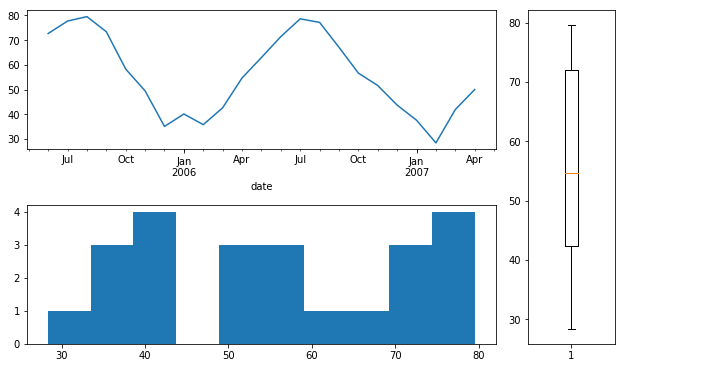

In [8]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(10,5))
gs = gridspec.GridSpec(nrows=2, ncols=5, figure=fig)
ax1 = fig.add_subplot(gs[0,:-2]) 
_ = cpp.plot(ax=ax1, legend=None) #extensibility!
ax2 = fig.add_subplot(gs[1,:-2])
_ = ax2.hist(cp['temp'])
ax3 = fig.add_subplot(gs[:,-2:-1])
_ = ax3.boxplot(cp['temp'])

In [10]:
stlist = ['NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US', 
          'NEW YORK LAGUARDIA AIRPORT NY US',
          'NEW YORK CENTRAL PARK OBS BELVEDERE TOWER NY US']
df['temp'] = (df['MNTM']/10*9/5) + 32
df['date'] = pd.to_datetime(df['DATE'], format="%Y%m%d")
dfg = df[df['STATION_NAME'].isin(stlist)][["STATION_NAME", 'date', 'temp']]

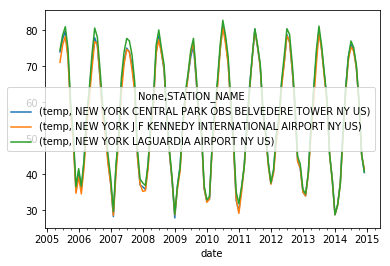

In [11]:
_ = dfg.groupby(['date','STATION_NAME']).max().unstack().plot()

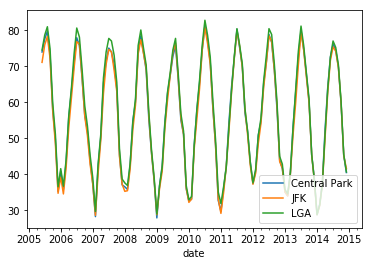

In [12]:
fig, ax = plt.subplots()
_ = dfg.groupby(['date','STATION_NAME']).max().unstack().plot(legend=False, ax=ax)
_ = ax.legend(['Central Park', 'JFK', 'LGA'])

# Seaborn
* declarative
* scientific visualizations
* great at grouping

/home/hannah/miniconda3/envs/viztalk/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


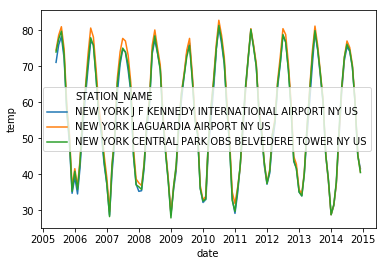

In [13]:
import seaborn as sns
_ = sns.lineplot(x="date", y="temp", 
                 hue="STATION_NAME", data=dfg)

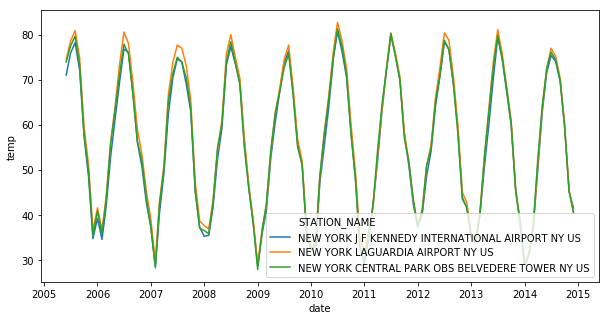

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5))
_ = sns.lineplot(x="date", y="temp", hue="STATION_NAME", 
                 data=dfg, ax=ax)


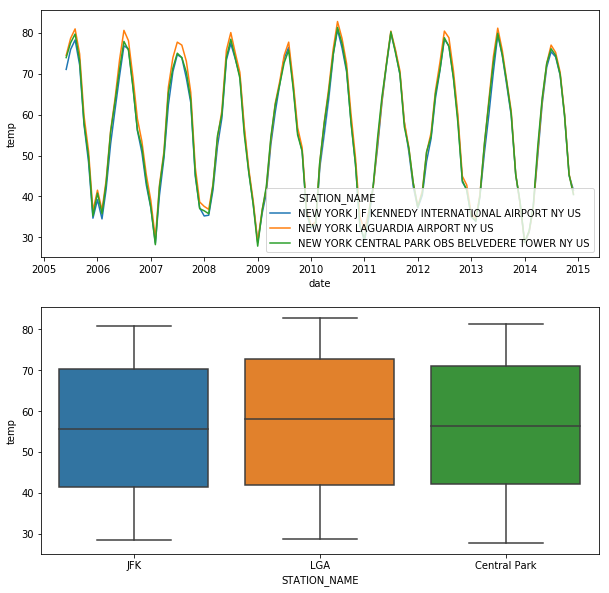

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,10))
_ = sns.lineplot(x="date", y="temp", hue="STATION_NAME", data=dfg, ax=ax1)
_ = sns.boxplot(x="STATION_NAME", y="temp", data=dfg, ax=ax2)
_ = ax2.set_xticklabels(["JFK", "LGA", "Central Park"])